# Exploratory Data Analysis

Author: Gillian A. McGinnis, final-semester M.S. Information Science - Machine Learning  
The University of Arizona College of Information  
INFO 698 - Capstone  
Start date: 24 September 2025  
Last updated: 04 October 2025

In [1]:
"""
Module providing supporting code and generating all images/tables for EDA.
"""

'\nModule providing supporting code and generating all images/tables for EDA.\n'

## Load Required Libraries

In [2]:
# General packages
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import datetime as dt

In [3]:
## (Optional chunk)
# Current session information
import session_info
session_info.show(dependencies=False)

## Load data

Files of interest:
- `weir_calibration.csv` includes calibration points for the weir
- `bci_lutzweir_combined.csv` includes raw runoff measurement, corrected runoff measurement, data source (*Chart measurements can be removed)
- `bci_cl_ra_elect2.CSV` has corrected rainfall (`ra`) in mm with measurements of `0` as `NA`s (`bci_cl_ra_elect.csv` has `0`s)
- `bci_lutz_deep_gsm_man.csv`, `bci_lutz_shallow_gsm_man.csv` have soil moisture measurements (water by wet weight and water by dry weight; one can be chosen for analysis as they are linearly related)
<!-- `bci_cl_ra_elect.csv` has corrected rainfall (`ra`) in mm, contains `0`s (large file) -->

All values level values are in mm, and datetime is in UTC-5 (Panama time zone).


### Import

In [4]:
## Calibrations dataset
data_calibrations = pd.read_csv(
    "data/weir_calibration.csv",
    usecols = ['datetime', 'weir_level'], # weir_hour is a repeat of the time in datetime and can be skipped
    parse_dates=['datetime'],
    date_format='%d/%m/%Y %H:%M:%S',
    index_col='datetime'
)

data_calibrations.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6465 entries, 1994-01-03 08:46:00 to 2025-09-02 08:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   weir_level  6465 non-null   int64
dtypes: int64(1)
memory usage: 101.0 KB


In [5]:
# Combined data

data_all_combined = pd.read_csv(
    "data/bci_lutzweir_combined.csv",
    usecols = ['datetime', 'level', 'raw', 'chk_note', 'chk_fail', 'comment', 'source'],
    parse_dates=['datetime'],
    dtype = {'source':'category', 'chk_note':'category', 'chk_fail':'str', 'comment':'str'},
    date_format='%d/%m/%Y %H:%M:%S',
    index_col='datetime'
)

## This variation checks first if the dataset is already loaded into the workspace
# try:
#     if data_combined.empty == False:
#         print("Data loaded, random sample shown below")
#         print(data_combined.sample(n=5))
# except NameError:
#     print("Data has not yet been read in, loading now...")
#     data_combined = pd.read_csv(
#         "data/bci_lutzweir_combined.csv",
#         usecols = ['datetime', 'level', 'raw', 'chk_note', 'chk_fail', 'comment', 'source'],
#         parse_dates=['datetime'],
#         dtype = {'source':'category', 'chk_note':'category', 'chk_fail':'str', 'comment':'str'},
#         date_format='%d/%m/%Y %H:%M:%S'
#     )

data_all_combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3951119 entries, 1972-01-01 01:00:00 to 1977-03-06 23:45:00
Data columns (total 6 columns):
 #   Column    Dtype   
---  ------    -----   
 0   level     float64 
 1   raw       float64 
 2   chk_note  category
 3   chk_fail  object  
 4   comment   object  
 5   source    category
dtypes: category(2), float64(2), object(2)
memory usage: 158.3+ MB


In [6]:
# Rainfall dataset

# This data set skips the 0 readings (therefore much smaller):
data_all_rainfall = pd.read_csv(
    "data/bci_elect_cl_ra/bci_cl_ra_elect2.CSV",
    parse_dates=['datetime'],
    dtype = {'chk_note':'category', 'chk_fail':'str'},
    date_format='%d/%m/%Y %H:%M:%S',
    index_col='datetime'
)

## This data set includes the 0 readings:
# data_rainfall_zeroes = pd.read_csv(
#         "data/bci_elect_cl_ra/bci_cl_ra_elect.csv",
#         usecols = ['datetime', 'ra', 'raw', 'chk_note', 'chk_fail'],
#         # "data/bci_elect_cl_ra/bci_cl_ra_elect2.CSV",
#         # usecols = ['datetime', 'level', 'raw', 'chk_note', 'chk_fail', 'comment', 'source'],
#         parse_dates=['datetime'],
#         dtype = {'chk_note':'category', 'chk_fail':'str'},
#         # dtype = {'source':'category', 'chk_note':'category', 'chk_fail':'str', 'comment':'str'},
#         date_format='%d/%m/%Y %H:%M:%S'
#     )

data_all_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 179640 entries, 1929-01-02 08:00:00 to 2025-08-04 11:55:00
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   ra        179640 non-null  float64 
 1   raw       179640 non-null  float64 
 2   chk_note  179640 non-null  category
 3   chk_fail  29 non-null      object  
dtypes: category(1), float64(2), object(1)
memory usage: 5.7+ MB


In [7]:
# Soil datasets

# Shallow
data_all_soil_shallow = pd.read_csv(
    "data/bci_manual_soilh/bci_lutz_shallow_gsm_man.csv",
    parse_dates=['date'],
    usecols = ['date', 'depth', 'sample', 'h2o_by_wet', 'chk_note', 'chk_fail'],
    dtype = {'depth':'category', 'sample':'category', 'chk_note':'category', 'chk_fail':'str'},
    date_format='%d/%m/%Y',
    index_col='date'
)

# Deep
data_all_soil_deep = pd.read_csv(
    "data/bci_manual_soilh/bci_lutz_deep_gsm_man.csv",
    parse_dates=['date'],
    usecols = ['date', 'depth', 'sample', 'h2o_by_wet', 'chk_note', 'chk_fail'],
    dtype = {'depth':'category', 'sample':'category', 'chk_note':'category', 'chk_fail':'str'},
    date_format='%d/%m/%Y',
    index_col='date'
)

data_all_soil_shallow.info()
data_all_soil_deep.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18556 entries, 1972-03-03 to 2025-06-26
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   depth       18556 non-null  category
 1   sample      18556 non-null  category
 2   h2o_by_wet  18556 non-null  float64 
 3   chk_note    18556 non-null  category
 4   chk_fail    178 non-null    object  
dtypes: category(3), float64(1), object(1)
memory usage: 490.8+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15637 entries, 1972-03-03 to 2025-06-26
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   depth       15637 non-null  category
 1   sample      15637 non-null  category
 2   h2o_by_wet  15637 non-null  float64 
 3   chk_note    15637 non-null  category
 4   chk_fail    20 non-null     object  
dtypes: category(3), float64(1), object(1)
memory usage: 413.4+ KB


*A note about the soil datasets:

Both `h2o_by_wet` and `h2o_by_dry` are available in the datasets.
Because they are linearly related to each other, only one of them is necessary for modelling.
Arbitrarily, `h2o_by_wet` has been chosen for this analysis.

### Cleanup

Some data cleanup is necessary to ensure ease of combining the sets and creation of the models.

#### Dates
Only values that are non-CHART will be evaluated (i.e., after 1989).

In [8]:
# Get earliest and latest dates of sources

cat_source = data_all_combined.sort_index()['source'].unique().tolist()
# Header for printed table
print("Earliest", "\t    ", "Latest", "\t\t", "Source")
# Iterate across each source type
for cat in cat_source:
    # If the source is NaN
    if pd.isna(cat) == True:
        temp_subset = data_all_combined[data_all_combined['source'].isnull()]
    else:
        temp_subset = data_all_combined[data_all_combined['source'] == cat]
    # Sort index
    temp_subset = temp_subset.sort_index()
    # Print
    print(temp_subset.index[0], "", temp_subset.index[-1], cat)

# Save space, remove no longer needed items
del cat_source, cat, temp_subset

Earliest 	     Latest 		 Source
1972-01-01 01:00:00  2015-03-18 14:15:00 CHART
1972-09-16 00:15:00  2025-08-01 13:00:00 nan
1989-07-19 11:55:00  1996-10-01 23:55:00 CHART+AF
1996-10-02 00:00:00  2013-01-13 05:50:00 ISCO
2012-04-23 08:30:00  2012-04-24 08:35:00 ESTIMATED
2014-08-22 10:30:00  2021-05-19 09:40:00 RADAR
2018-08-31 10:05:00  2018-09-05 12:55:00 TROLL


In [9]:
# Filter the dataset to only be non-CHART values
data_combined = data_all_combined[data_all_combined['source'] != 'CHART']

# Arrange
data_combined = data_combined.sort_index()
# Remove a few extra points
data_combined = data_combined['1978-01-01 00:00:01':]

# Get earliest and latest dates
date_weir_start = data_combined.index[0]
date_weir_end = data_combined.index[-1]

In [10]:
# Create function to filter dates
def filter_dates(input_dataset, input_date_start = date_weir_start, input_date_end = date_weir_end):
    """Function to filter inputted data set by start and end dates.
    
    Args:
        input_dataset (pd.DataFrame): Data indexed by datetime.
        input_date_start (Timestamp): The start date, defaults to the earliest from the combined data set.
        input_date_end (Timestamp): The end date, defaults to the earliest from the combined data set.
    
    Returns:
        DataFrame sorted and filtered to be within the specified range.
    """
    # Sort the dataframe
    data_subset = input_dataset.sort_index()
    # Filter between dates
    data_subset = data_subset.loc[input_date_start:input_date_end]
    return data_subset

In [11]:
# Apply filter
data_rainfall = filter_dates(data_all_rainfall)
data_soil_deep = filter_dates(data_all_soil_deep)
data_soil_shallow = filter_dates(data_all_soil_shallow)

In [12]:
# Remove old stuff to save space
del data_all_combined, data_all_rainfall, data_all_soil_shallow, data_all_soil_deep

#### Soil depths
There are some duplicated records between the "shallow" and "deep" data set. Most are identical, but there were two dates with differing records.
It was concluded that those values from the "deep" set with a depth of "0–10" may be eliminated.

In [13]:
# Select the values in the deep data set that have the shallower depth
data_deep_subset = data_soil_deep[data_soil_deep["depth"] != "30-40"]
# Filter set to only be of dates where deep set has shallow values
data_shallow_subset = data_soil_shallow[data_soil_shallow.index.isin(data_deep_subset.index)]
# Inner merge based on date and sample number
data_soil_mismatch = pd.merge(data_deep_subset.reset_index(), data_shallow_subset.reset_index(), on=["date", "sample"], suffixes=("_deep", "_shallow"), how="inner")
# Create a variable to indicate if the values match
data_soil_mismatch["match_wet"] = (data_soil_mismatch["h2o_by_wet_deep"] == data_soil_mismatch["h2o_by_wet_shallow"])
# The dry var was not loaded in this analysis, but the exact same issue occurred in it (i.e., the same dates had mismatching values)
# match_all["match_dry"] = (match_all["h2o_by_dry_deep"] == match_all["h2o_by_dry_shallow"])
# Set the sample var to be an integer, for sorting purposes
data_soil_mismatch["sample"] = data_soil_mismatch["sample"].astype('int')
# Sort by date and sample for readability
data_soil_mismatch = data_soil_mismatch.sort_values(by=['date', 'sample'])
# Remove unneeded columns
data_soil_mismatch = data_soil_mismatch.drop(['chk_fail_shallow', 'chk_fail_deep'], axis=1)
# Filter where there is a mismatch
data_soil_mismatch = data_soil_mismatch[(data_soil_mismatch["match_wet"]==False)]
# match_all = match_all[['date', 'depth_shallow', 'depth_deep', 'sample', 'h2o_by_wet_shallow', 'h2o_by_wet_deep', 'h2o_by_dry_shallow', 'h2o_by_dry_deep', 'chk_note_shallow', 'chk_note_deep']]
# Reordering vars for readability
data_soil_mismatch = data_soil_mismatch[['date', 'depth_shallow', 'depth_deep', 'sample', 'h2o_by_wet_shallow', 'h2o_by_wet_deep', 'chk_note_shallow', 'chk_note_deep']]
# Print result
data_soil_mismatch

,date,depth_shallow,depth_deep,sample,h2o_by_wet_shallow,h2o_by_wet_deep,chk_note_shallow,chk_note_deep
129,2005-06-16,1-10,0-10,1,43.0,40.8,good,good
128,2005-06-16,1-10,0-10,2,37.8,36.5,good,good
127,2005-06-16,1-10,0-10,3,36.1,36.4,good,good
126,2005-06-16,1-10,0-10,4,38.4,38.6,good,good
125,2005-06-16,1-10,0-10,5,37.7,37.5,good,good
124,2005-06-16,1-10,0-10,6,37.9,37.5,good,good
123,2005-06-16,1-10,0-10,7,32.7,34.1,good,good
122,2005-06-16,1-10,0-10,8,28.1,28.8,good,good
121,2005-06-16,1-10,0-10,9,34.2,33.2,good,good
120,2005-06-16,1-10,0-10,10,32.1,32.2,good,good


In [14]:
# Cleanup
del data_shallow_subset, data_deep_subset, data_soil_mismatch

In [15]:
# Remove the duplicated samples
data_soil_deep = data_soil_deep[data_soil_deep["depth"] != "0-10"]

## Exploration

### General Variables

In [16]:
# Explore weir combined data, comments, etc.
print(
    "-----Data types-----", data_combined.dtypes,
    "\n-----Source-----", data_combined['source'].value_counts(dropna = False),
    "\n-----Notes-----", data_combined['chk_note'].value_counts(dropna = False),
    "\n-----Comments-----", data_combined['comment'].value_counts(dropna = False),
    "\n-----Fail mode-----", data_combined['chk_fail'].value_counts(dropna = False),
    sep="\n"
)

-----Data types-----
level        float64
raw          float64
chk_note    category
chk_fail      object
comment       object
source      category
dtype: object

-----Source-----
source
ISCO         1656120
CHART+AF      752435
RADAR         702704
NaN           523281
TROLL           1428
ESTIMATED        290
CHART              0
Name: count, dtype: int64

-----Notes-----
chk_note
good        2455818
adjusted     832182
nc           333964
missing       14293
bad               1
Name: count, dtype: int64

-----Comments-----
comment
NaN             3636242
Data missing         16
Name: count, dtype: int64

-----Fail mode-----
chk_fail
NaN                                                   2810553
Calibration                                            399338
Obstruction                                            302756
Gap Fill                                                73670
Obstruction, Calibration                                20644
Calibration, Obstruction                       

### Visualization

In [62]:
def plot_between(input_date_start, input_date_end, include_calibration=True):
    """Plot values between two dates in the style of the Visual FoxPro interface.

    Args:
        input_date_start (Timestamp): The start date.
        input_date_end (Timestamp): The end date.
        include_calibration (boolean): Include X-markers for the calibration points.
    
    Returns:
        Time series plot.
    """
    # Filter the data sets
    data_subset = data_combined.loc[input_date_start:input_date_end]
    data_subset_rain = data_rainfall.loc[input_date_start:input_date_end]
    data_subset_cal = data_calibrations.loc[input_date_start:input_date_end]

    fig, ax = plt.subplots(figsize=(10, 6))
    plt.axhline(y=0, color ='grey', linestyle = ':')
    # Plot the rain as a bar chart with a multiplier for visibility
    ax.vlines(data_subset_rain.index, ymin=0, ymax=data_subset_rain['ra']*3, color = 'blue', label = "Rain (x3)")
    ax.plot(data_subset.index, data_subset['level'], color = 'red', label = "Adjusted")
    ax.plot(data_subset.index, data_subset['raw'], color = 'green', label = "Raw")
    # Include calibration points unless otherwise specified or unless there are none in the subset
    if include_calibration == True and not data_subset_cal.empty:
        ax.plot(data_subset_cal.index, data_subset_cal['weir_level'], linestyle='none', marker='x', color='red', label = "Calibration")

    # Plot labels
    ax.set_xlabel("Date (YYYY-MM-DD)")
    ax.set_ylabel("Level (mm)")
    # ax.set_title('Simple Time Series Plot')
    ax.set_title("Runoff time series from " + input_date_start + " through " + input_date_end)
    # ax.set_ylim(bottom=0) 
    # ax.grid(True)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    # Reverse the order of the legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='upper right')
    # plt.legend(loc = 'upper right')
    return plt.show()

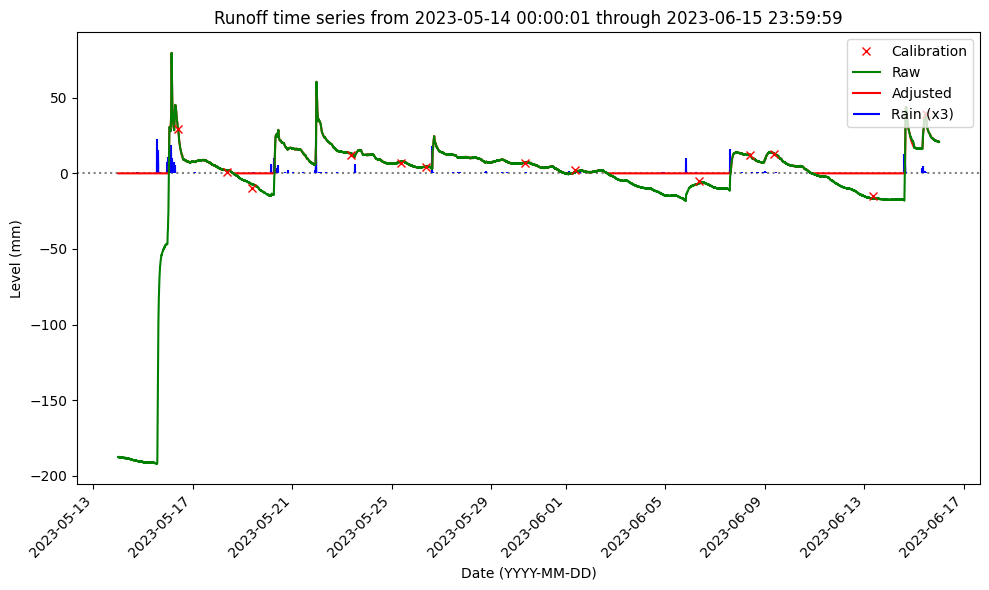

In [63]:
# plot_between('2010-05-20 00:00:01','2010-05-25 23:59:59')
# plot_between('2020-05-31 00:00:01','2020-06-16 23:59:59')
plot_between('2023-05-14 00:00:01','2023-06-15 23:59:59')
# plot_between('2002-07-30 00:00:01','2002-08-02 23:59:59')

### Statistics

In [ ]:
# Source insights
print(data_combined['1978-01-01 00:00:01':].groupby('source', dropna=False, observed=True)['raw'].agg(['count','mean', 'min', 'max']))

In [ ]:
data_nosubz = data_combined[data_combined['raw'] > 0]
data_nosubz['raw'].dropna().resample('1YE').agg(['mean','std', 'min', 'max']).dropna()
# data_sumstats

In [ ]:
# time_series = pd.Series(data_combined, index='datetime')
# time_series
# pd.DatetimeIndex.to_series(data_combined)
# time_series = pd.to_datetime(data_combined.index())

# data_combined.index.year
# data_mini = data_combined['2010-05-20 00:00:01':'2010-05-25 23:59:59']
# data_mini = data_combined['2010-05-01 00:00:01':'2010-10-31 23:59:59']
# data_mini['raw'].resample('1ME').agg(['mean','std'])

# data_mini.rolling(2, on='raw').sum()
# data_mini.rolling('1D', on='raw').sum()
# data_mini['raw'].rolling('1D').mean()
# data_mini['raw'].rolling('1D', closed='left').mean()
# data_mini['raw'].resample('1D').mean()

# data_mini['raw'].resample('1ME').mean()
# data_combined['raw'].dropna()
# data_combined['raw'].resample('YE').agg(['mean','std'])
# data_mini = data_combined['raw'].dropna()
# data_combined['1972-01-01 00:00:01':'1973-12-31 23:59:59']

# # Remove missing values
# data_mini = data_combined[data_combined['chk_note']!='missing']
# # Remove a few extra points
# data_mini = data_mini['1978-01-01 00:00:01':]
# data_mini.resample('YE').agg(['mean','std'])

# data_sumstats = data_mini['1989-01-01 00:00:01':'1989-12-31 23:59:59']
# data_sumstats = data_combined['raw'].dropna().resample('6ME').agg(['mean','std']).dropna()
# data_sumstats = data_combined['raw'].dropna().resample('1ME').agg(['mean','std', 'min', 'max']).dropna()
###
# data_sumstats = data_combined['raw'].dropna().resample('1YE').agg(['mean','std', 'min', 'max']).dropna()
# data_sumstats
###
# plt.figure(figsize=(12,6))
# plt.plot(data_sumstats.index, data_sumstats['mean'])
# plt.plot(data_sumstats.index, data_sumstats['std'])
# plt.show()

# print(data_mini['source'].value_counts(dropna = False))
# data_mini.rolling('1D').sum()
# data_mini.rolling(5).sum()

data_sumstats = data_combined[data_combined['raw'] > 0]
# data_sumstats = data_sumstats['raw'].dropna().resample('1ME').agg(['mean','std', 'min', 'max']).dropna()
data_sumstats = data_sumstats['raw'].dropna().resample('1ME').agg(['mean','std', 'min', 'max'])
data_sumstats

In [ ]:
#Plot

fig, ax = plt.subplots(figsize=(10, 3))
# fig, ax = plt.subplots(figsize=(10, 6))
    # ax.figure(figsize=(10, 6))
# 
# Line for 0
# plt.axhline(y=0, color = "grey", linestyle = ":")
# 
# ax.vlines(data_subset_rain.index, ymin=0, ymax=data_subset_rain['ra']*3, color = "blue", label = "Rain (x3)")
# ax.plot(data_sumstats.index, data_sumstats['mean'], color = "red", label = "Mean", marker = 'x')
# 
# Mean
ax.plot(data_sumstats.index, data_sumstats['mean'], color = "green", label = "Mean")
# ax.plot(data_sumstats.index, data_sumstats['mean'], color = "green", label = "Mean", marker='.')
# Ribbon for standard deviation
ax.fill_between(data_sumstats.index, data_sumstats['mean']-data_sumstats['std'], data_sumstats['mean']+data_sumstats['std'], color = "aquamarine", label = "std")
# ax.plot(data_subset_cal.index, data_subset_cal['weir_level'], linestyle='none', marker='x', color="red", label = "Calibration")
# plt.plot(data_subset_rain.index, data_subset_rain['ra']*3, color = "blue", linestyle='none', marker='o')
# plt.plot(data_calibrations.index, data_calibrations['level'], color = "red")
ax.set_xlabel('Year')
ax.set_ylabel('Level (mm)')
ax.set_title('Average raw values every 1mo')
# ax.set_title('Simple Time Series Plot')
ax.set_ylim(bottom=0)
ax.set_xlim(left = dt.date(1989, 1, 1), right=dt.date(2026, 1, 1))
# ax.grid(True)
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6)) # Show ticks every month
ax.xaxis.set_major_locator(mdates.YearLocator(month=1)) # Show ticks at start of year
# ax.xaxis.set_minor_locator(mdates.YearLocator(month=7)) # Show ticks every month
# plt.xticks(np.arange(min(data_sumstats.index), max(data_sumstats.index)+1, 1.0),rotation=45, ha='right')
plt.xticks(rotation=90)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.tight_layout()
plt.grid(axis='x', which='major')
plt.legend(loc = 'upper right')
# Truncate plot at 0
ax.set_ylim(bottom=0,top=200)
# ax.set_ylim(bottom=0)

plt.show()

del fig, ax